# **Apply image processing techniques (scaling, rotation, blurring, edge detection) using OpenCV**

# **Step 1: Install OpenCV**

In [ ]:
!pip install opencv-python-headless


**OpenCV** is a powerful library for image processing. The opencv-python-headless package is installed using the pip command in Google Colab. This version of OpenCV is designed for use in environments where GUI operations are not necessary, like in Colab.

# **Step 2: Import Necessary Librari**es

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display an image using matplotlib
def display_image(img, title="Image"):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Function to display two images side by side
def display_images(img1, img2, title1="Image 1", title2="Image 2"):
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.axis('off')

    plt.show()


* **cv2:** This imports OpenCV, which provides functions for image processing.
* **numpy (np):** This library is used for handling arrays and matrices, which images are represented as.
* **matplotlib.pyplot (plt):** This is used to display images in a Jupyter notebook or Google Colab environment.

# **Step 3: Load an Image**

Saving Pictureme.jpg to Pictureme.jpg


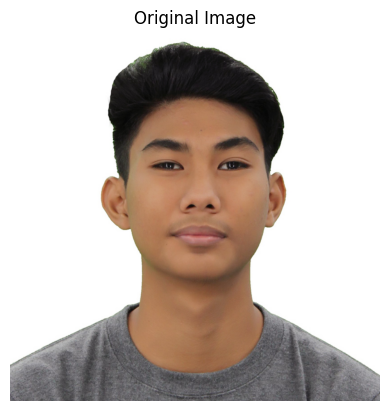

In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image

# Upload an image
uploaded = files.upload()

# Convert to OpenCV format
image_path = next(iter(uploaded))  # Get the image file name
image = Image.open(BytesIO(uploaded[image_path]))
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

display_image(image, "Original Image")


* **display_image():** Converts the image from BGR (OpenCV's default color format) to RGB (the format expected by matplotlib) and displays it using imshow().
* **display_images():** This function allows two images to be displayed side by side for comparison. We use subplot to create a grid of plots (here, 1 row and 2 columns).

# **Exercise 1: Scaling and Rotation**

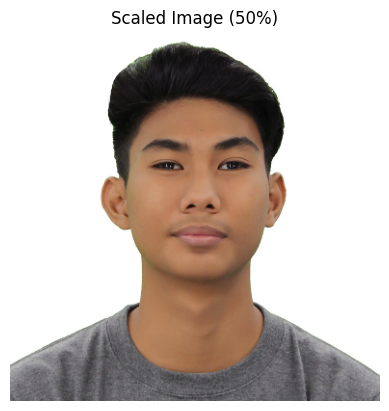

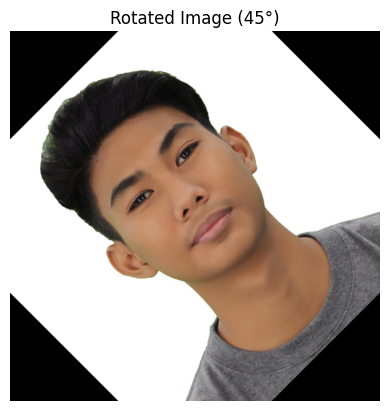

'\nThese lines apply the scaling and rotation functions to the uploaded image and display the results.\n'

In [ ]:
# Scaling
def scale_image(img, scale_factor):
    height, width = img.shape[:2]
    scaled_img = cv2.resize(img,
(int(width * scale_factor), int(height * scale_factor)), interpolation=cv2.INTER_LINEAR)
    return scaled_img

"""
scale_image(): This function scales the image by a given factor.
The cv2.resize() function takes the original dimensions of the image,
multiplies them by the scale_factor, and resizes the image accordingly.
INTER_LINEAR is a common interpolation method for resizing.
"""

# Rotate
def rotate_image(img, angle):
    height, width = img.shape[:2]
    center = (width // 2, height // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, matrix, (width, height))
    return rotated_img

"""
rotate_image(): Rotates the image around its center. cv2.getRotationMatrix2D() creates
a transformation matrix for rotation, and cv2.warpAffine() applies this transformation.
The angle parameter controls the degree of rotation.
"""

# Scale image by 0.5
scaled_image = scale_image(image, 0.5)
display_image(scaled_image, "Scaled Image (50%)")

# Rotate image by 45 degrees
rotated_image = rotate_image(image, 45)
display_image(rotated_image, "Rotated Image (45°)")

"""
These lines apply the scaling and rotation functions to the uploaded image and display the results.
"""

# **Exercise 2: Blurring Techniques**

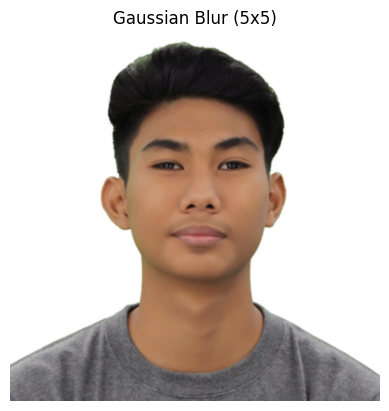

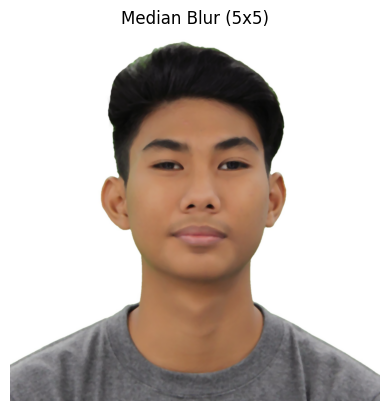

"\ncv2.medianBlur(): Applies a median blur, which replaces each pixel's value with the\nmedian value of its neighbors in a 5x5 kernel. This method is particularly effective in\nremoving salt-and-pepper noise.\n"

In [ ]:
# Gaussian Blur
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)
display_image(gaussian_blur, "Gaussian Blur (5x5)")

"""
cv2.GaussianBlur(): Applies a Gaussian blur to the image, which smooths it by averaging
the pixel values in a 5x5 kernel (a small matrix). This is useful for reducing noise in an image.
"""

# Median Blur
median_blur = cv2.medianBlur(image, 5)
display_image(median_blur, "Median Blur (5x5)")

"""
cv2.medianBlur(): Applies a median blur, which replaces each pixel's value with the
median value of its neighbors in a 5x5 kernel. This method is particularly effective in
removing salt-and-pepper noise.
"""


# **Exercise 3: Edge Detection using Canny**

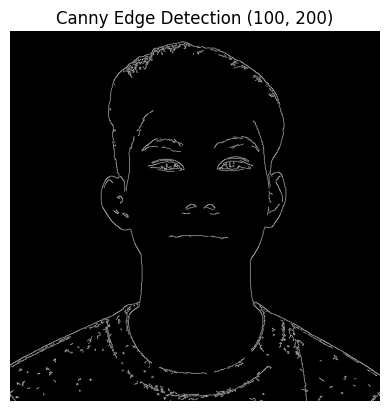

"\ncv2.Canny(): Detects edges in the image by calculating the gradient (rate of intensity change)\nbetween pixels. The two threshold values (100 and 200) define the edges'\nsensitivity. Lower thresholds detect more edges, while higher thresholds detect only the\nmost prominent edges.\n"

In [ ]:
# Canny Edge Detection
edges = cv2.Canny(image, 100, 200)
display_image(edges, "Canny Edge Detection (100, 200)")

"""
cv2.Canny(): Detects edges in the image by calculating the gradient (rate of intensity change)
between pixels. The two threshold values (100 and 200) define the edges'
sensitivity. Lower thresholds detect more edges, while higher thresholds detect only the
most prominent edges.
"""
